# Animal classification

## 0. Description

Let's make an application that identifies which animal appears in the picture given. We are going to get the data, train the model and put it into production.

## 1. Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import skimage

import tensorflow as tf

## 2. Importing the data

### `2.1. Base case`

Veamos como se carga una sola imagen y se muestra en pantalla:

In [2]:
img=plt.imread('data/LionHead/lion007.jpg')
img.shape

(80, 80, 3)

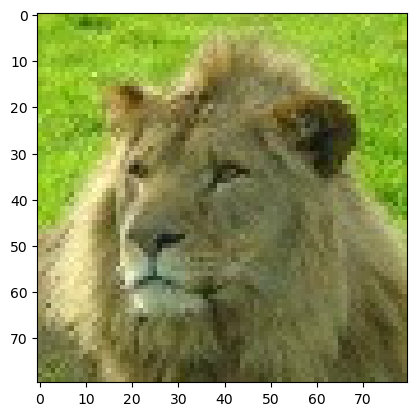

In [3]:
plt.imshow(img)

### `2.2. Real case`

Generamos dos listas, una con todas las imágenes cargadas con la ruta, y otra con las etiquetas, que serán las carpetas de nuestro directorio.

In [4]:
data=os.listdir('data')
img_list=[]
label_list=[]
for folder in data:
    for file in os.listdir('data/'+folder):
        if os.path.isfile('data/'+folder+'/'+file):
            img=plt.imread('data/'+folder+'/'+file)
            label_list.append(folder)
            img_list.append(img)

In [5]:
df=pd.DataFrame(data={"img":img_list,"label":label_list})
df.head()

,img,label
0,"[[[196, 214, 188], [196, 214, 188], [196, 214,...",BearHead
1,"[[[4, 2, 3], [7, 5, 6], [6, 5, 3], [5, 4, 2], ...",BearHead
2,"[[[104, 109, 102], [104, 111, 103], [108, 115,...",BearHead
3,"[[[124, 122, 123], [119, 117, 118], [116, 112,...",BearHead
4,"[[[173, 182, 199], [174, 183, 200], [172, 181,...",BearHead


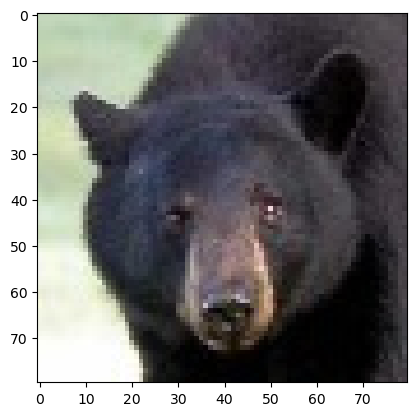

In [6]:
plt.imshow(df.loc[0,'img'])

### `2.3. Label names`

In [7]:
i=0
for word in df['label']:
    df.iloc[i,1]=word.replace('Head','')
    i+=1

In [8]:
df.label.unique()

array(['Bear', 'Cat', 'Chicken', 'Cow', 'Deer', 'Dog', 'Duck', 'Eagle',
       'Elephant', 'Human', 'Lion', 'Monkey', 'Mouse', 'Natural', 'Panda',
       'Pigeon', 'Rabbit', 'Sheep', 'Tiger', 'Wolf'], dtype=object)

In [9]:
df.shape

(2057, 2)

### `2.4. Trial`

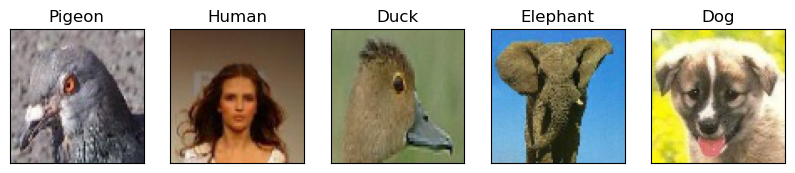

In [10]:
fig,ax=plt.subplots(1,5,figsize=(10,4))
for i in range(5):
    j=np.random.randint(0,df.shape[0])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1,5,i+1)
    plt.imshow(df.loc[j,'img'])
    plt.title(df.loc[j,'label'])

We can repeat this execution every time we want in order to check if the labels are right.

### `2.5. Data saving`

In [11]:
with open('pickle_files/diego_dataframe.pkl','wb') as f:
    pickle.dump(df,f)

## 3. Modeling

### `3.0. Label encoding`

In [12]:
df.head()

,img,label
0,"[[[196, 214, 188], [196, 214, 188], [196, 214,...",Bear
1,"[[[4, 2, 3], [7, 5, 6], [6, 5, 3], [5, 4, 2], ...",Bear
2,"[[[104, 109, 102], [104, 111, 103], [108, 115,...",Bear
3,"[[[124, 122, 123], [119, 117, 118], [116, 112,...",Bear
4,"[[[173, 182, 199], [174, 183, 200], [172, 181,...",Bear


In [13]:
dict_labels={}
i=0
for label in df.label.unique():
    dict_labels[label]=i
    i+=1
print(dict_labels)

{'Bear': 0, 'Cat': 1, 'Chicken': 2, 'Cow': 3, 'Deer': 4, 'Dog': 5, 'Duck': 6, 'Eagle': 7, 'Elephant': 8, 'Human': 9, 'Lion': 10, 'Monkey': 11, 'Mouse': 12, 'Natural': 13, 'Panda': 14, 'Pigeon': 15, 'Rabbit': 16, 'Sheep': 17, 'Tiger': 18, 'Wolf': 19}


In [14]:
mapeo={}
for key in dict_labels.keys():
    mapeo[dict_labels[key]]=key
print(mapeo)

{0: 'Bear', 1: 'Cat', 2: 'Chicken', 3: 'Cow', 4: 'Deer', 5: 'Dog', 6: 'Duck', 7: 'Eagle', 8: 'Elephant', 9: 'Human', 10: 'Lion', 11: 'Monkey', 12: 'Mouse', 13: 'Natural', 14: 'Panda', 15: 'Pigeon', 16: 'Rabbit', 17: 'Sheep', 18: 'Tiger', 19: 'Wolf'}


Let's save the mapping

In [15]:
with open('pickle_files/diego_mapeo.pkl','wb') as f:
    pickle.dump(mapeo,f)

In [16]:
df["label_2"]=0

In [17]:
for i in range(df.shape[0]):
    df.iloc[i,2]=dict_labels[df.iloc[i,1]]
df.sample(5)

,img,label,label_2
1620,"[[[72, 172, 222], [70, 170, 220], [69, 169, 21...",Pigeon,15
1906,"[[[52, 60, 21], [81, 89, 48], [75, 82, 41], [9...",Tiger,18
1389,"[[[67, 55, 67], [64, 51, 58], [78, 60, 60], [7...",Mouse,12
1980,"[[[229, 228, 255], [228, 229, 255], [218, 219,...",Wolf,19
1596,"[[[188, 175, 156], [190, 175, 156], [190, 175,...",Pigeon,15


In [18]:
df["label"]=df["label_2"]
df.drop(columns=["label_2"],inplace=True)
df.sample(5)

,img,label
353,"[[[13, 7, 9], [13, 7, 9], [11, 7, 8], [10, 6, ...",2
438,"[[[82, 90, 13], [136, 144, 71], [87, 94, 27], ...",3
485,"[[[124, 123, 59], [126, 122, 59], [139, 131, 6...",4
1244,"[[[60, 51, 34], [61, 52, 35], [62, 53, 36], [6...",11
1152,"[[[232, 200, 149], [234, 202, 151], [234, 202,...",10


### ``3.1. Data split``

In [19]:
x_train,x_test,y_train,y_test=train_test_split(df['img'],df['label'],test_size=0.2,random_state=42)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1645,), (412,), (1645,), (412,))

We need to change the format of the images.

In [21]:
x_train=np.array(x_train.tolist())
x_test=np.array(x_test.tolist())
x_train.shape,x_test.shape

((1645, 80, 80, 3), (412, 80, 80, 3))

In [22]:
y_train

67       0
1001     9
567      5
1271    11
1666    16
        ..
1638    15
1095     9
1130    10
1294    11
860      7
Name: label, Length: 1645, dtype: int64

### `3.2. Encoding`

In [23]:
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.transform(y_test)
type(y_train),type(y_test)

(numpy.ndarray, numpy.ndarray)

In [24]:
x_train=np.array(x_train/255)
x_test=np.array(x_test/255)
type(x_train),type(x_test)

(numpy.ndarray, numpy.ndarray)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1645, 80, 80, 3), (412, 80, 80, 3), (1645,), (412,))

### ``3.3. Modeling and training``

#### First neural network (linear regression)

In [26]:
layers=[]
layers.append(tf.keras.layers.Flatten(input_shape=(80,80,3)))
layers.append(tf.keras.layers.Dense(20,activation='softmax'))

model=tf.keras.Sequential(layers)

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
history = model.fit(x_train,y_train,epochs=30,use_multiprocessing=False, verbose=False,
                    validation_data=(x_test, y_test))
print('Training Accuracy: {:.4f}'.format(model.evaluate(x_train,y_train)[1]))

52/52 [==============================] - 0s 3ms/step - loss: 0.3396 - accuracy: 0.8821
Training Accuracy: 0.8821


In [29]:
def training_plot( metricas, history):
    plt.figure(figsize=(10,3))
    for i,metrica in enumerate(metricas):
        plt.subplot(1,2,i+1)
        y = history.history[metrica]
        x = [ x+1 for x in range( len( history.history[metrica] ))]
        plt.plot(x,y)
        y = history.history[f'val_{metrica}']
        x = [ x+1 for x in range( len( history.history[f'val_{metrica}'] ))]
        plt.plot(x,y)
        plt.title(metrica)
        plt.legend([f'{metrica}',f'val_{metrica}'])

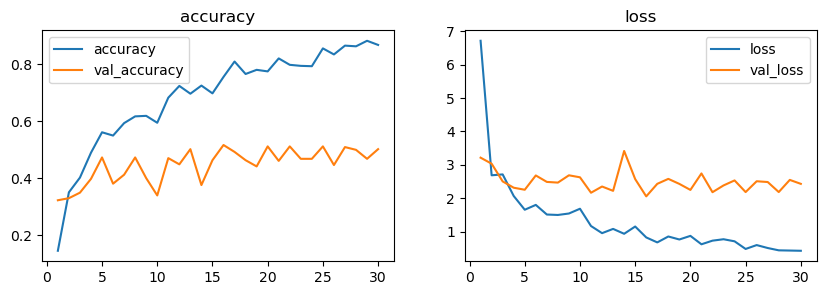

In [30]:
training_plot(['accuracy','loss'],history)

#### Let's define a new neural network now.

In [31]:
layers=[]
layers.append(tf.keras.layers.Flatten(input_shape=(80,80,3)))
layers.append(tf.keras.layers.Dense(1500,activation='relu'))
layers.append(tf.keras.layers.Dropout(0.2))
layers.append(tf.keras.layers.Dense(20,activation='softmax'))

model=tf.keras.Sequential(layers)

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001) ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
history = model.fit(x_train,y_train,epochs=10,use_multiprocessing=False,
                    validation_data=(x_test, y_test),batch_size=128)
print('Training Accuracy: {:.4f}'.format(model.evaluate(x_train,y_train)[1]))

Epoch 1/10


13/13 [==============================] - 2s 156ms/step - loss: 3.7903 - accuracy: 0.1198 - val_loss: 2.7660 - val_accuracy: 0.1456
Epoch 2/10
13/13 [==============================] - 2s 142ms/step - loss: 2.6693 - accuracy: 0.2085 - val_loss: 2.4867 - val_accuracy: 0.2427
Epoch 3/10
13/13 [==============================] - 2s 164ms/step - loss: 2.3504 - accuracy: 0.2906 - val_loss: 2.3014 - val_accuracy: 0.2985
Epoch 4/10
13/13 [==============================] - 2s 144ms/step - loss: 2.2293 - accuracy: 0.3331 - val_loss: 2.1454 - val_accuracy: 0.3883
Epoch 5/10
13/13 [==============================] - 2s 135ms/step - loss: 2.0725 - accuracy: 0.3994 - val_loss: 2.0560 - val_accuracy: 0.4005
Epoch 6/10
13/13 [==============================] - 2s 162ms/step - loss: 1.9720 - accuracy: 0.4353 - val_loss: 2.0144 - val_accuracy: 0.4393
Epoch 7/10
13/13 [==============================] - 2s 146ms/step - loss: 1.8562 - accuracy: 0.4748 - val_loss: 1.9391 - val_accuracy: 0.4320
Epoch 8/10
13/13 

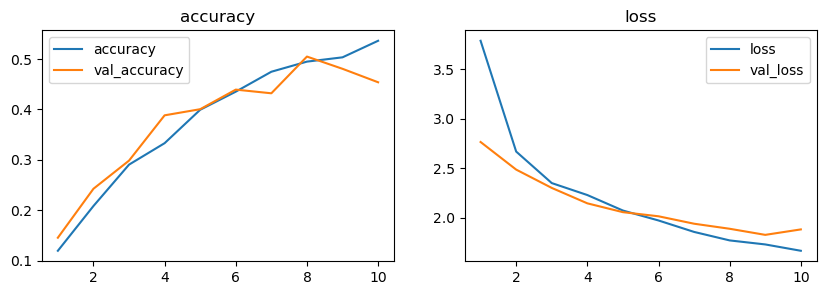

In [34]:
training_plot(['accuracy','loss'],history)

#### Deep neural network (more than one hidden layer)

In [35]:
layers=[]
layers.append(tf.keras.layers.Flatten(input_shape=(80,80,3)))
layers.append(tf.keras.layers.Dense(1500,activation='relu'))
layers.append(tf.keras.layers.Dropout(0.2))
layers.append(tf.keras.layers.Dense(1000,activation='relu'))
layers.append(tf.keras.layers.Dropout(0.2))
layers.append(tf.keras.layers.Dense(20,activation='softmax'))

model=tf.keras.Sequential(layers)

In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001) ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
history = model.fit(x_train,y_train,epochs=20,use_multiprocessing=False,
                    validation_data=(x_test, y_test),batch_size=128)
print('Training Accuracy: {:.4f}'.format(model.evaluate(x_train,y_train)[1]))

Epoch 1/20


13/13 [==============================] - 3s 159ms/step - loss: 3.1925 - accuracy: 0.1076 - val_loss: 2.7403 - val_accuracy: 0.1650
Epoch 2/20
13/13 [==============================] - 2s 152ms/step - loss: 2.6978 - accuracy: 0.1799 - val_loss: 2.5532 - val_accuracy: 0.2136
Epoch 3/20
13/13 [==============================] - 2s 169ms/step - loss: 2.4917 - accuracy: 0.2517 - val_loss: 2.3342 - val_accuracy: 0.3277
Epoch 4/20
13/13 [==============================] - 2s 170ms/step - loss: 2.3381 - accuracy: 0.2948 - val_loss: 2.2632 - val_accuracy: 0.3422
Epoch 5/20
13/13 [==============================] - 2s 170ms/step - loss: 2.1951 - accuracy: 0.3672 - val_loss: 2.2364 - val_accuracy: 0.3641
Epoch 6/20
13/13 [==============================] - 2s 169ms/step - loss: 2.1280 - accuracy: 0.3720 - val_loss: 2.0658 - val_accuracy: 0.3883
Epoch 7/20
13/13 [==============================] - 2s 167ms/step - loss: 2.0278 - accuracy: 0.3988 - val_loss: 2.0518 - val_accuracy: 0.3883
Epoch 8/20
13/13 

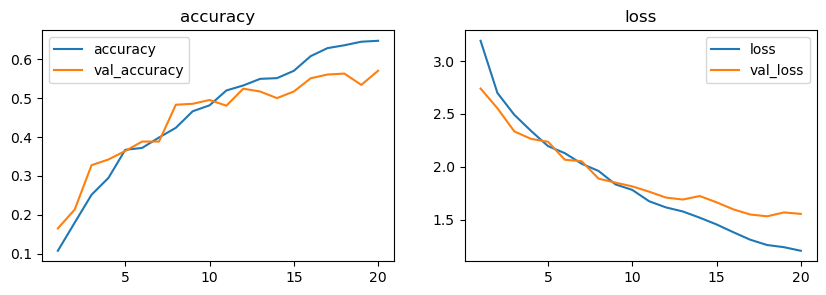

In [38]:
training_plot(['accuracy','loss'],history)

#### Convolutional neural network

In [39]:
layers=[]

layers.append(tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(80,80,3)))
layers.append(tf.keras.layers.MaxPooling2D((2,2)))
layers.append(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
layers.append(tf.keras.layers.MaxPooling2D((2,2)))

layers.append(tf.keras.layers.Flatten())
layers.append(tf.keras.layers.Dense(1500,activation='relu'))
layers.append(tf.keras.layers.Dropout(0.2))
layers.append(tf.keras.layers.Dense(1000,activation='relu'))
layers.append(tf.keras.layers.Dropout(0.2))
layers.append(tf.keras.layers.Dense(20,activation='softmax'))

model=tf.keras.Sequential(layers)

In [41]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001) ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [42]:
history = model.fit(x_train,y_train,epochs=20,use_multiprocessing=False,
                    validation_data=(x_test, y_test),batch_size=128,callbacks=[checkpoint])
print('Training Accuracy: {:.4f}'.format(model.evaluate(x_train,y_train)[1]))

Epoch 1/20


13/13 [==============================] - 9s 613ms/step - loss: 2.9054 - accuracy: 0.1131 - val_loss: 2.7664 - val_accuracy: 0.1505
Epoch 2/20
13/13 [==============================] - 7s 568ms/step - loss: 2.6250 - accuracy: 0.2383 - val_loss: 2.4029 - val_accuracy: 0.3058
Epoch 3/20
13/13 [==============================] - 8s 639ms/step - loss: 2.2912 - accuracy: 0.3173 - val_loss: 2.1645 - val_accuracy: 0.3617
Epoch 4/20
13/13 [==============================] - 8s 648ms/step - loss: 2.0185 - accuracy: 0.4079 - val_loss: 1.8483 - val_accuracy: 0.4806
Epoch 5/20
13/13 [==============================] - 8s 644ms/step - loss: 1.7774 - accuracy: 0.4748 - val_loss: 1.6998 - val_accuracy: 0.4879
Epoch 6/20
13/13 [==============================] - 7s 582ms/step - loss: 1.5800 - accuracy: 0.5502 - val_loss: 1.5176 - val_accuracy: 0.5583
Epoch 7/20
13/13 [==============================] - 8s 585ms/step - loss: 1.3665 - accuracy: 0.6195 - val_loss: 1.3496 - val_accuracy: 0.6044
Epoch 8/20
13/13 

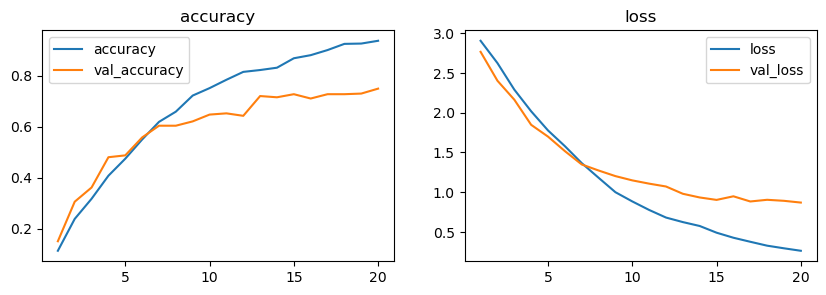

In [43]:
training_plot(['accuracy','loss'],history)

We are going to save the model.

In [44]:
model.save('model/model.h5')

## 4. Transfer Learning

## 5. Testing

### Simple testing

In [45]:
predictions=model.predict(x_test)


13/13 [==============================] - 1s 49ms/step


In [46]:
predictions.shape

(412, 20)

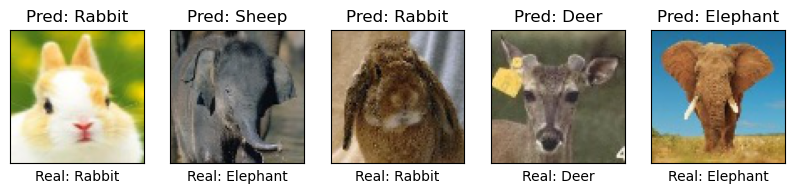

In [47]:
fig,ax=plt.subplots(1,5,figsize=(10,4))
for i in range(5):
    j=np.random.randint(0,x_test.shape[0])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[j])
    plt.title(f'Pred: {mapeo[np.argmax(predictions[j])]}')
    plt.xlabel(f'Real: {mapeo[y_test[j]]}')
plt.show()

In [48]:
print(f'Accuracy: {np.sum(np.argmax(predictions,axis=1)==y_test)/y_test.shape[0]}')
print(f'Error: {np.sum(np.argmax(predictions,axis=1)!=y_test)/y_test.shape[0]}')

Accuracy: 0.75
Error: 0.25


In [49]:
df_pred=pd.DataFrame(data={'pred':np.argmax(predictions,axis=1),'real':y_test})
df_pred.head()

,pred,real
0,5,1
1,18,18
2,1,1
3,10,10
4,14,14


In [50]:
df_pred["real"]=df_pred["real"].apply(lambda x: mapeo[x])
df_pred["pred"]=df_pred["pred"].apply(lambda x: mapeo[x])

In [51]:
df_pred.head()

,pred,real
0,Dog,Cat
1,Tiger,Tiger
2,Cat,Cat
3,Lion,Lion
4,Panda,Panda


In [52]:
df_pred["exito"]=(df_pred["real"]==df_pred["pred"]).astype(int)

In [53]:
df_pred.exito.value_counts()

1    309
0    103
Name: exito, dtype: int64

Let's see it in a confussion matrix, which shows how many predictions there were for each label

In [54]:
pd.crosstab(df_pred['real'],df_pred['pred'],margins=True)

pred,Bear,Cat,Chicken,Cow,Deer,Dog,Duck,Eagle,Elephant,Human,Lion,Monkey,Mouse,Panda,Pigeon,Rabbit,Sheep,Tiger,Wolf,All
real,,,,,,,,,,,,,,,,,,,,
Bear,16,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,20
Cat,0,21,0,0,0,2,2,0,0,0,0,1,2,0,1,1,0,0,3,33
Chicken,0,0,24,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,25
Cow,1,0,0,10,0,2,0,0,1,1,0,1,1,0,0,0,5,0,0,22
Deer,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,1,1,0,1,23
Dog,1,1,0,0,0,19,1,0,0,0,0,0,1,0,0,1,0,0,0,24
Duck,0,1,0,0,0,0,17,0,0,0,0,0,0,0,2,0,0,0,0,20
Eagle,0,0,0,0,0,0,3,8,0,0,0,0,1,3,4,0,0,0,0,19
Elephant,1,0,0,0,0,3,0,0,19,0,0,0,1,0,0,0,1,0,0,25


In [55]:
import sklearn.metrics as metrics

In [56]:
pd.DataFrame(metrics.classification_report(df_pred['real'],df_pred['pred'],output_dict=True)).T.sort_values(by='f1-score',ascending=False)

c:\Users\diego\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\diego\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\diego\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
Chicken,1.000000,0.960000,0.979592,25.00
Deer,1.000000,0.869565,0.930233,23.00
Human,0.947368,0.900000,0.923077,20.00
Panda,0.857143,1.000000,0.923077,18.00
Tiger,0.882353,0.882353,0.882353,17.00
Elephant,0.904762,0.760000,0.826087,25.00
Lion,0.823529,0.700000,0.756757,20.00
Wolf,0.818182,0.692308,0.750000,26.00
Pigeon,0.692308,0.818182,0.750000,22.00
accuracy,0.750000,0.750000,0.750000,0.75


In [57]:
pd.options.display.float_format = '{:.4f}'.format
df_proba=pd.DataFrame(predictions,columns=[mapeo[i] for i in range(20)])
df_proba

,Bear,Cat,Chicken,Cow,Deer,Dog,Duck,Eagle,Elephant,Human,Lion,Monkey,Mouse,Natural,Panda,Pigeon,Rabbit,Sheep,Tiger,Wolf
0,0.0142,0.0153,0.0007,0.0059,0.0058,0.2836,0.0517,0.0141,0.1073,0.0059,0.1458,0.0110,0.0819,0.0145,0.0000,0.0107,0.1424,0.0116,0.0048,0.0726
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0000,0.0000,0.0000,0.0002,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.9995,0.0000
2,0.0008,0.9531,0.0000,0.0000,0.0000,0.0000,0.0000,0.0012,0.0000,0.0000,0.0001,0.0001,0.0173,0.0001,0.0234,0.0000,0.0014,0.0023,0.0000,0.0001
3,0.0192,0.0007,0.0030,0.0042,0.0002,0.0454,0.0234,0.0010,0.0039,0.0022,0.8815,0.0053,0.0012,0.0017,0.0010,0.0003,0.0036,0.0004,0.0017,0.0001
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0.0352,0.0003,0.0001,0.0017,0.0013,0.1146,0.0020,0.0001,0.0384,0.0000,0.0403,0.6797,0.0123,0.0018,0.0002,0.0307,0.0285,0.0011,0.0035,0.0084
408,0.0000,0.0000,0.9981,0.0001,0.0000,0.0002,0.0000,0.0001,0.0000,0.0001,0.0001,0.0004,0.0006,0.0000,0.0000,0.0000,0.0002,0.0000,0.0000,0.0000
409,0.0291,0.0021,0.0002,0.0067,0.0005,0.0101,0.0001,0.0001,0.0114,0.0000,0.8601,0.0522,0.0001,0.0102,0.0056,0.0000,0.0004,0.0000,0.0004,0.0107
410,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9999,0.0000,0.0000,0.0000,0.0000,0.0000


### Bear or not

Let's analyse it as a binary classification problem (bear or not) 

In [58]:
y_test_s=pd.Series(y_test)
y_test_s=y_test_s.apply(lambda x: mapeo[x])
y_test_s

0          Cat
1        Tiger
2          Cat
3         Lion
4        Panda
        ...   
407     Monkey
408    Chicken
409       Lion
410      Panda
411      Mouse
Length: 412, dtype: object

In [59]:
y_test_s=(y_test_s=="Bear").astype(int)
y_test_s

0      0
1      0
2      0
3      0
4      0
      ..
407    0
408    0
409    0
410    0
411    0
Length: 412, dtype: int32

In [60]:
y_test_s.value_counts()

0    392
1     20
dtype: int64

C:\Users\diego\AppData\Local\Temp\ipykernel_14732\882954125.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,color='red')
C:\Users\diego\AppData\Local\Temp\ipykernel_14732\882954125.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--',color='blue')


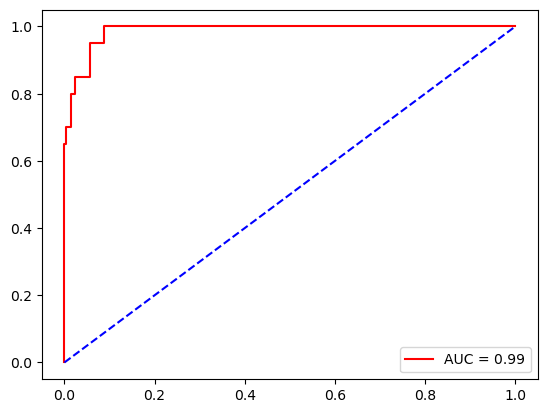

In [61]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_s, df_proba['Bear'])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--',color='blue')

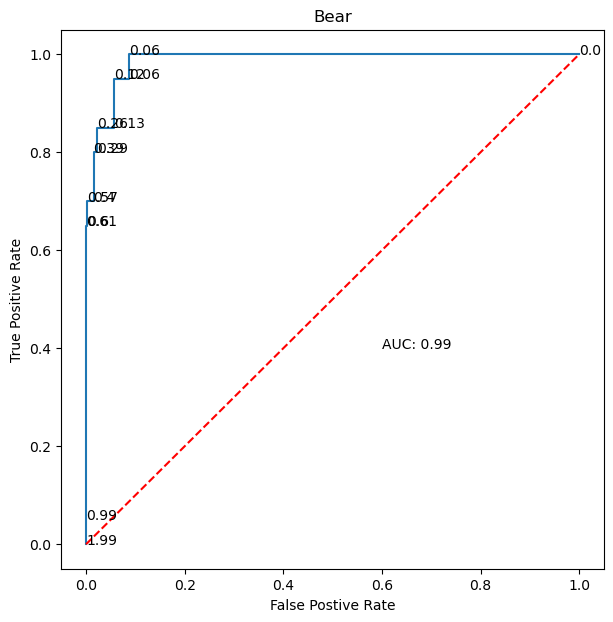

In [62]:
plt.figure(figsize=(7,7))
fpr, tpr, _ = metrics.roc_curve(y_test_s, df_proba['Bear'] )
metrica_auc = metrics.auc(fpr, tpr)
plt.plot( fpr, tpr ) 
plt.plot([0,1],[0,1], color='Red', linestyle='--')
plt.annotate(f'AUC: { round(metrica_auc,2)}', [0.6,0.4])
plt.title('Bear')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
for x in range( len(_)):
    plt.annotate( round(_[x],2), [ fpr[x], tpr[x] ])

In [63]:
np.round(_*100,2)

array([198.71,  98.71,  61.32,  59.86,  56.55,  40.16,  39.  ,  28.84,
        25.56,  13.33,  12.19,   6.21,   6.02,   0.  ], dtype=float32)

Let's set a threshold of 30%.

In [64]:
y_pred_s_30=(df_proba['Bear']>0.3).astype(int)
y_pred_s_30.value_counts()

0    388
1     24
Name: Bear, dtype: int64

In [65]:
y_test_s_30=(y_test_s==1).astype(int)
y_test_s_30.value_counts()

0    392
1     20
dtype: int64

In [66]:
pd.crosstab(y_test_s,y_pred_s_30, margins= True )

Bear,0,1,All
row_0,,,
0,384,8,392
1,4,16,20
All,388,24,412


In [67]:
print(f'The accuracy of the model is: {metrics.accuracy_score(y_test_s,y_pred_s_30)}')
print(f'The precision of the model is: {metrics.precision_score(y_test_s,y_pred_s_30)}')
print(f'The recall of the model is: {metrics.recall_score(y_test_s,y_pred_s_30)}')

The accuracy of the model is: 0.970873786407767
The precision of the model is: 0.6666666666666666
The recall of the model is: 0.8


### For all labels

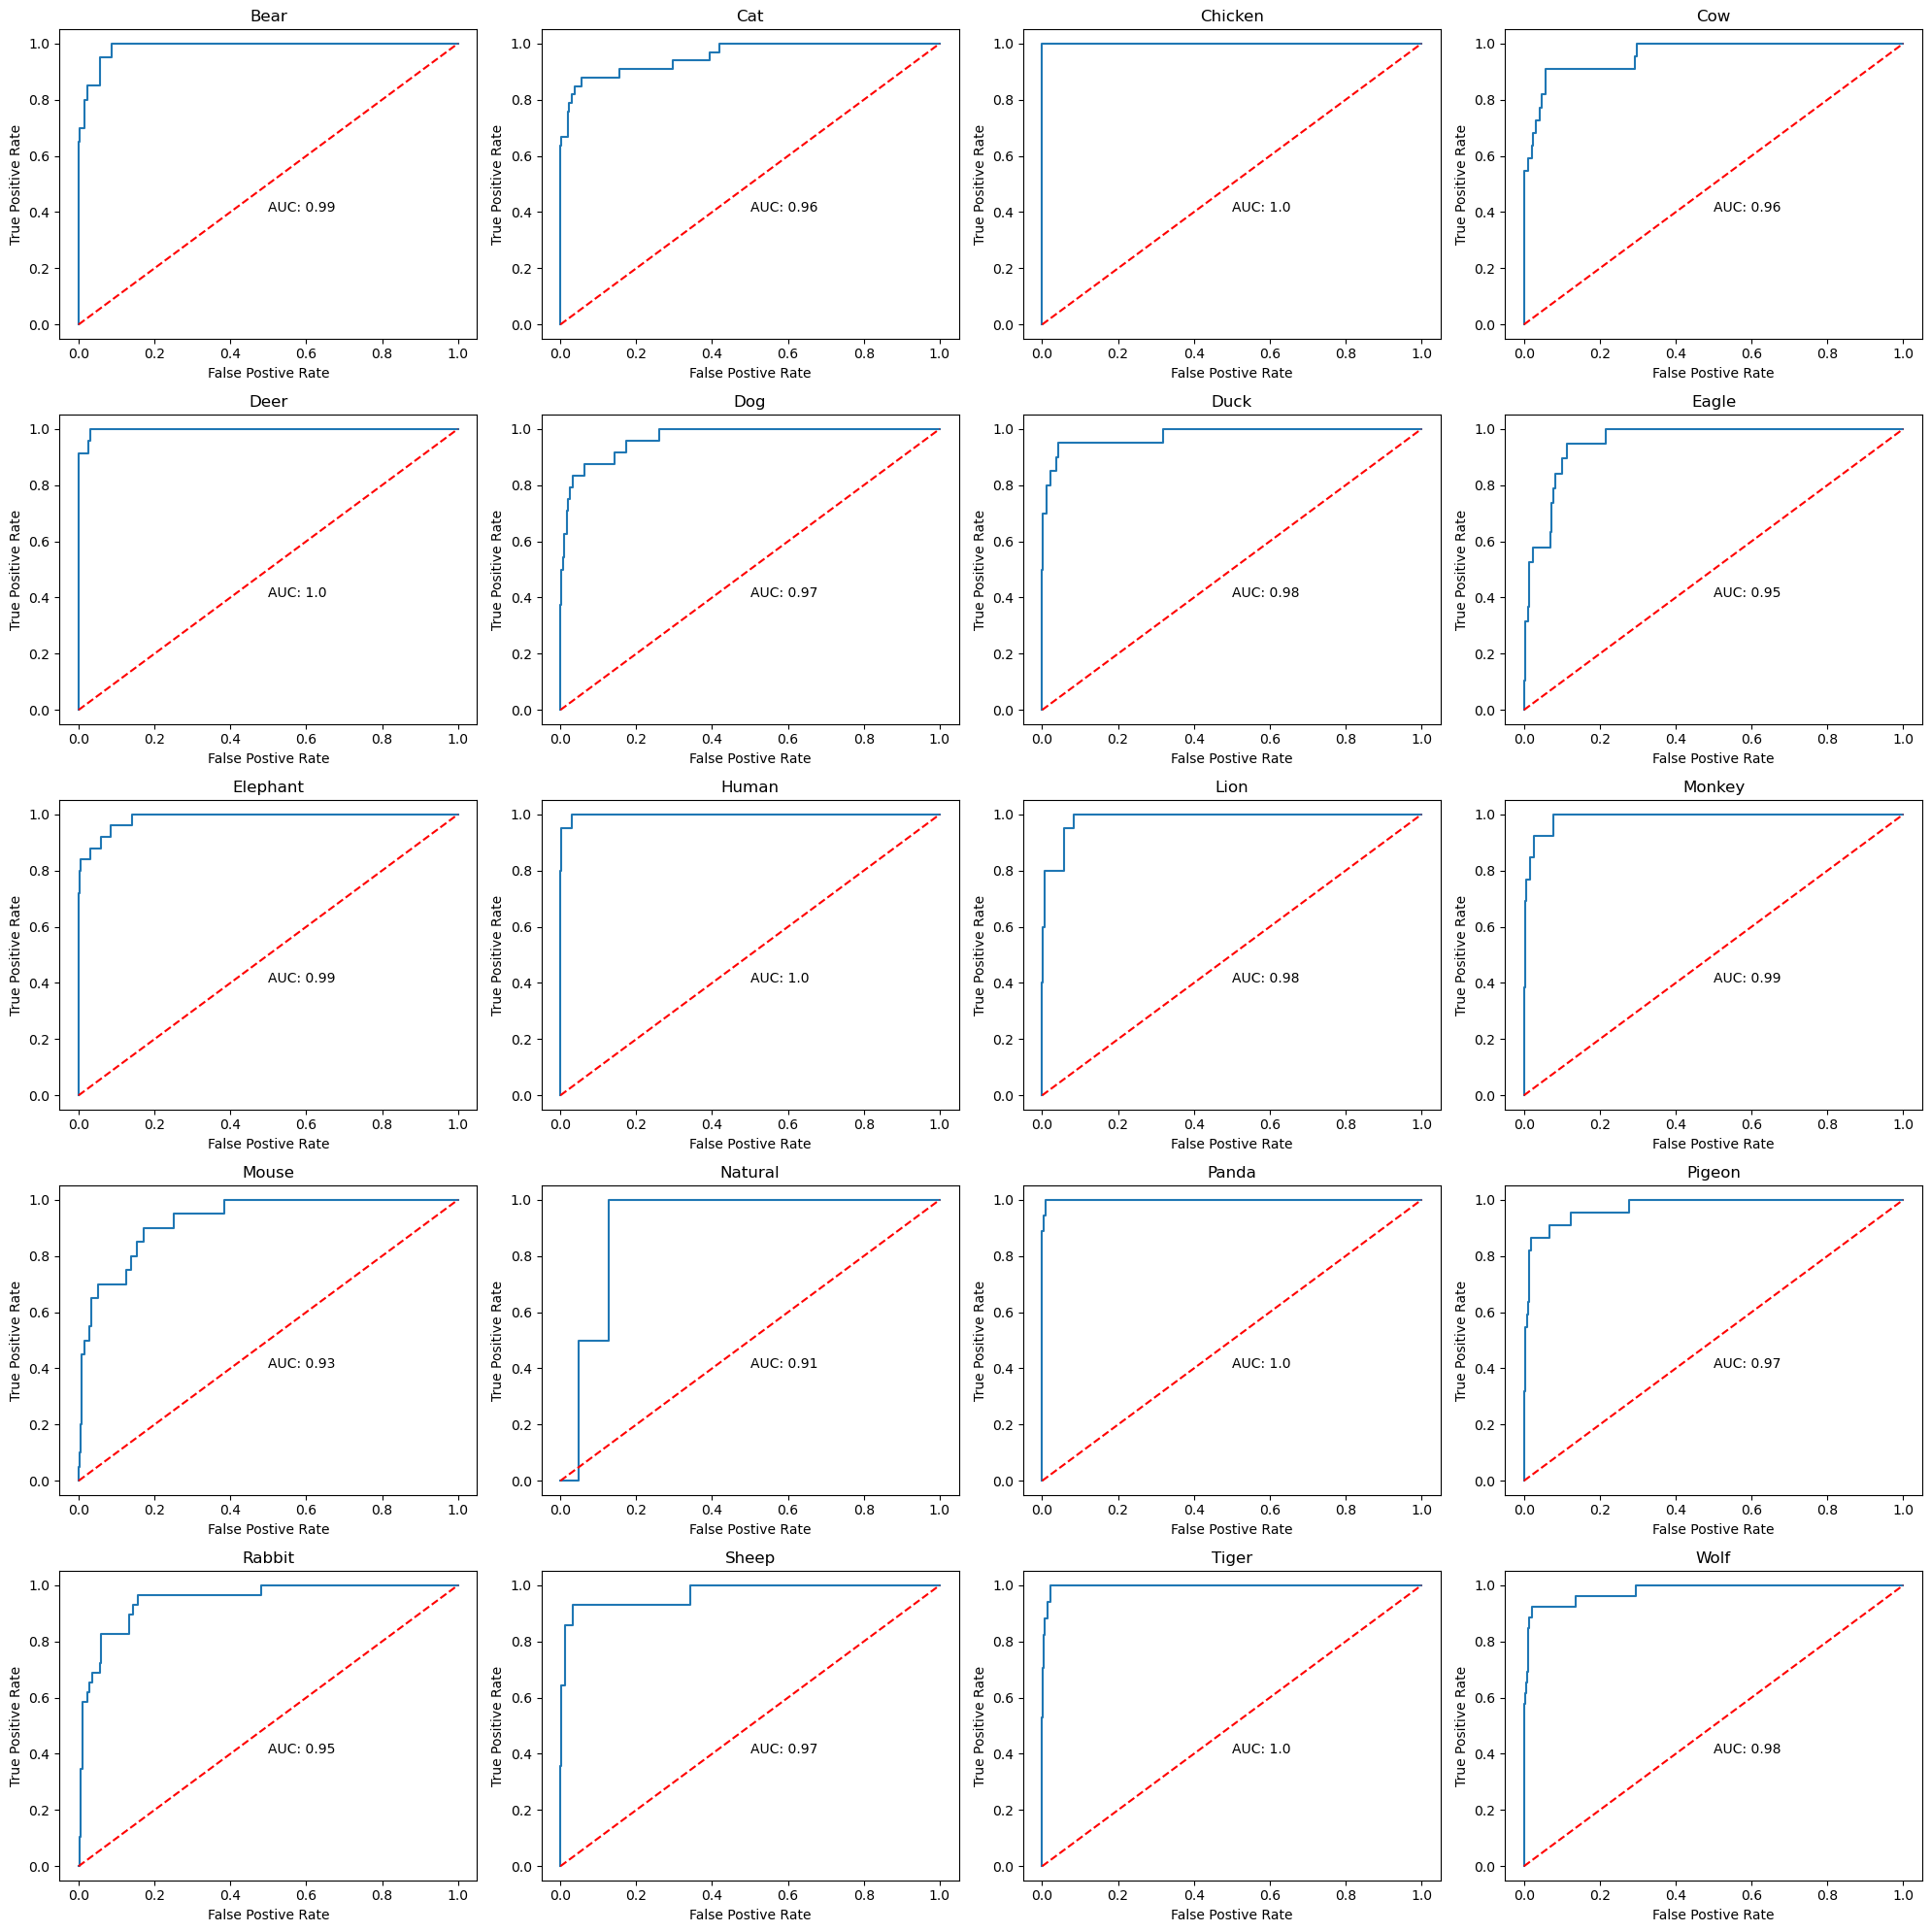

In [68]:
plt.figure(figsize=(20,20))
for i,clase in enumerate(mapeo.values()):
    plt.subplot(5,4,i+1)
    y_test_s=pd.Series(y_test)
    y_test_s=y_test_s.apply(lambda x: mapeo[x])
    y_test_s=(y_test_s==clase).astype(int)
    fpr, tpr, _ = metrics.roc_curve(y_test_s, df_proba[clase] )
    metrica_auc = metrics.auc(fpr, tpr)
    plt.plot( fpr, tpr ) 
    plt.plot([0,1],[0,1], color='Red', linestyle='--')
    plt.annotate(f'AUC: { round(metrica_auc,2)}', [0.5,0.4])
    plt.title(clase)
    plt.xlabel('False Postive Rate')
    plt.ylabel('True Positive Rate')
plt.tight_layout()

### Other images prediction

We have some other images in the folde Images. Let's see if our model can identify them correctly.

In [69]:
def model_pipeline(file_path,mapping,model):
    img_path=file_path
    img=plt.imread(img_path)
    img=skimage.transform.resize(img,(80,80,3))
    img=np.array(img)
    predict=model.predict(img.reshape(1,80,80,3),verbose=False)
    results_s=(pd.Series(predict[0],index=[mapping[i] for i in range(20)]).sort_values(ascending=False)[:5]*100).to_dict()
    for key in results_s:
        results_s[key]=round(results_s[key],2)
    return results_s

In [70]:
model_pipeline('Images/eagle.jpg',mapeo,model)

{'Eagle': 85.72, 'Panda': 10.93, 'Sheep': 0.6, 'Duck': 0.54, 'Wolf': 0.46}

In [71]:
model_pipeline('Images/lion.jpg',mapeo,model)

{'Duck': 70.01, 'Chicken': 23.68, 'Monkey': 5.29, 'Human': 0.37, 'Dog': 0.14}

In [72]:
model_pipeline('Images/dog_test.jpg',mapeo,model)

{'Monkey': 45.38,
 'Chicken': 21.97,
 'Mouse': 20.78,
 'Rabbit': 6.11,
 'Dog': 2.33}